# <span style="color:blue">Python para cientistas</span>

## <span style="color:blue">Ajuste dados experimentais por regressão linear</span>
---


***Problema***


Vamos considerar o problema da determinação da constante de Planck h, a partir de dados obtidos
numa experiência com uma célula fotoelétrica, que consistem numa série de valores do potencial de
paragem $𝑉_𝑝$, em função do comprimento de onda da luz incidente na célula.

Utilizando a lei de Planck:

$$
E = h × ν
$$

em que $E$ é a energia de um foton e $\nu$
a sua frequência, e a lei de conservação da energia pode
escrever-se:

$$
𝑒𝑉_𝑝 = ℎν − W
$$

$$
y = mx + b
$$

em que $𝑊$ é a energia de arranque da célula, considerada constante para cada célula.  A partir da sua equação, Einstein fez a seguinte previsão: variando-se a freqüência, $ν$, da luz incidente e plotando-se $V_p$ versus $\nu$, obtêm-se uma reta, cujo coeficiente angular deve ser $h$, sendo $h$ uma constante universal, independente do material irradiado. Esta constante é conhecida como constante de Planck, determinada pela lei de radiação.

**O problema consiste, portanto, em:** dados $(𝑉_{𝑝,𝑘}, 𝜈_𝑘)(𝑘 = 1,2, … , 𝑁)$, calcular a melhor aproximação
possível (num sentido a definir) para $ℎ$. A solução do problema fornecerá igualmente um valor para
$𝑊$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
%matplotlib inline



***Formulação Matemática do problema***


**Regressão linear usando multiplicação matricial**

Dado um conjunto de pontos $(x_0, y_0),(x_1, y_1),\ldots,(x_n, y_n)$, podemos encontrar uma reta $y=\alpha_0+\alpha_1 x$ relacionada à esses pontos ao resolver o sistema linear na forma:

$$
A^\top A\alpha = A^\top b
$$

onde $A^\top$ é o transposto de $A$ sendo:

$$
A=\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{array}\right) \textrm{,  }
\qquad
\alpha = \left(\begin{array}{c}
\alpha_0 \\
\alpha_1
\end{array}\right) \textrm{,  }
\qquad
b = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right)
$$

Podemos considerar os pontos $(x_i, y_i)$  gerados por um experimento qualquer para construir uma matriz de dados $A$.



In [ ]:
#Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
%matplotlib inline



***Dados de 10 medidas de um
experimento real de uma célula fotoelétrica***

In [ ]:
#Visualizando os dados em forma de tabela

A = np.array([ [ 749, 1.],
     [724, 0.99],
     [699,0.89],
     [674,0.79],
     [649,0.68],
     [624,0.57],
     [599,0.47],
     [574,0.37],
     [549,0.28],
     [524,0.17],
     [499,0.07]])

df = pd.DataFrame(A, columns = ['nu (Frequência)','V_p (Pontencial)'])
print(df)

    nu (Frequência)  V_p (Pontencial)
0             749.0              1.00
1             724.0              0.99
2             699.0              0.89
3             674.0              0.79
4             649.0              0.68
5             624.0              0.57
6             599.0              0.47
7             574.0              0.37
8             549.0              0.28
9             524.0              0.17
10            499.0              0.07


In [ ]:
nu, Vp = 1e12*A[:,0], A[:,1]

In [ ]:
print(nu, Vp)

[7.49e+14 7.24e+14 6.99e+14 6.74e+14 6.49e+14 6.24e+14 5.99e+14 5.74e+14
 5.49e+14 5.24e+14 4.99e+14] [1.   0.99 0.89 0.79 0.68 0.57 0.47 0.37 0.28 0.17 0.07]


In [ ]:
#Frequência
nu=1e12*np.array([749,724,699,674,649,624,599,574,549,524,499],dtype=float)

#valores do potencial de paragem 𝑉_p (V)
Vp=np.array([1,0.99,0.89,0.79,0.68,0.57,0.47,0.37,0.28,0.17,0.07])


Após um pouco de manipulação algébrica é possível escrever os coeficientes, $\alpha_0$ e $ \alpha_1$ da equação $y=\alpha_0+\alpha_1 x$, como:

$$
\hat{\alpha} = \left ( A^{T}  \cdot A \right )^{-1} \cdot A^{T}\cdot Y
$$

Implementando a equação acima para determinar os coeficientes da equação.

In [ ]:
#Resolvendo o sistema linear para obter os coeficientes da equação linear
alpha_hat = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(Vp)

In [ ]:
print(alpha_hat)

[-6.50521303e-19  1.00000000e+00]


In [ ]:
#Utilizando somente o valor de interesse
h = - alpha_hat[:1]

In [ ]:
print(h)

[6.50521303e-19]


In [ ]:
# Valor predito para um próximo ponto de acordo com os dados obtidos.
yhat = A.dot(alpha_hat)

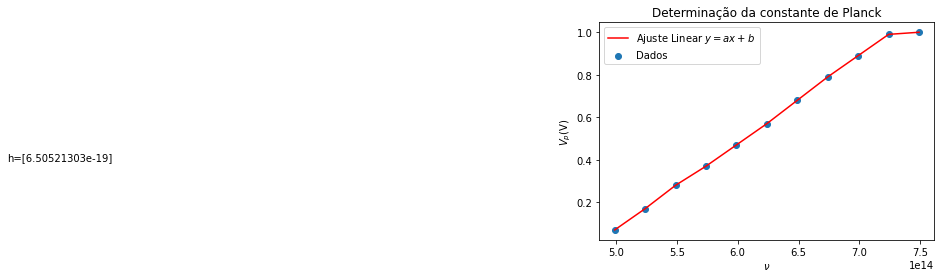

In [ ]:
# Plot dos dados e do valor predito (yhat)
plt.scatter(nu, Vp)
plt.plot(nu, yhat, color='red')
plt.text(6.0,0.4,'h='+str(h))
plt.xlabel(r'$\nu$')
plt.ylabel(r'$V_p$(V)')
plt.legend([r'Ajuste Linear $y = ax +b$', r'Dados'])
plt.title('Determinação da constante de Planck')
plt.show()
